# Calculation general CME distributions in $\beta$

\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi]}\sin\theta d\theta d\phi  \rho (\alpha(\theta, \phi)) \int \sin\theta' d\theta' \int d\phi' \rho^{CME}(\theta') \delta(\beta -\arccos ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

In [9]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt


In [10]:
# general distribution of active regions per unit area 
def rice_dist(x, sigma, nu):
    x = np.abs(x)
    return x / sigma**2 * np.exp( - (x**2 + nu **2 ) / (2 * sigma **2)) * sc.iv(0, (x * nu / sigma**2))

sigma_fit, nu_fit = (9.02769086 / 180 * np.pi, 10.48768514 / 180 * np.pi)

def rho(alpha, err=0.001):
    return rice_dist(np.pi / 2 - alpha, sigma_fit, nu_fit) / 2 / np.pi / (np.sin(alpha) + err) / 2 
            # fit of dist when integrated over phi and absolute value so accounting for that

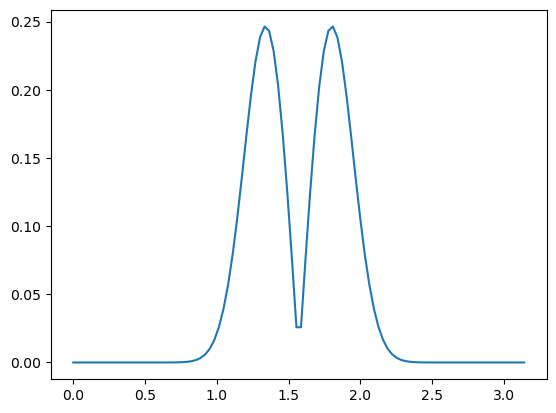

In [11]:
alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))

In [12]:
f = lambda x: rice_dist(x, sigma_fit, nu_fit)

from scipy.integrate import quad

quad(f,0, np.pi)

(1.0, 2.5350408352359244e-09)

Before for flare distribution we had
$$
\cos \alpha = \sin \tau \sin \theta \cos \phi +\cos \theta \cos \tau  $$
and $\mu = \cos \theta$

Now we have $\beta \sim \alpha, \theta \sim \tau, \theta'\sim \theta$ and $ \phi'\sim \phi$ so  
$$
\cos \beta = \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta  $$

The distribution for CME angle, properly normalized!

0.4946944833802725
1.0


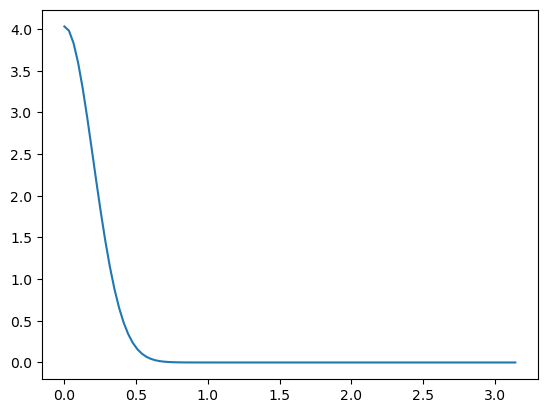

In [13]:
from scipy.stats import norm
# normalization, later to be determined
N = 1

def rho_CME(theta2, loc=0, scale = 0.2):
    return norm.pdf(theta2, loc, scale) /N

f = lambda theta2 : rho_CME(theta2) * np.sin(theta2) * 2 * np.pi


N = quad(f, 0, np.pi/2)[0]
print(N)
print(quad(f, 0, np.pi/2)[0])

T = np.linspace(0, np.pi, 100)
plt.plot(T, rho_CME(T))



In [14]:
# general distribution for given tau
def get_sinphi2(theta, phi, theta2, beta):
    cosphi2 = (np.cos(beta)  - np.cos(theta)*np.cos(theta2) )/ (np.sin(theta)*np.sin(theta2)) 
    return 0 if np.abs(cosphi2) >1 else (1-cosphi2**2)**0.5

def get_alpha(tau, theta, phi):
    return np.arccos( np.sin( tau ) * np.sin(theta) * np.cos(phi) + np.cos(tau) * np.cos(theta))



def f_integrand_(beta, tau, vec=True):
    if vec:
        def integrand_vec(x):
            theta = x[0]
            phi = x[1]
            theta2 = x[2]
            return integrand(theta, phi, theta2, beta, tau)
        return integrand_vec
    else:
        def integrand2(theta, phi, theta2):
            return integrand(theta, phi, theta2, beta, tau)
        return integrand2

def integrand(theta, phi, theta2, beta, tau):
    sinphi2 = get_sinphi2(theta, phi, theta2, beta)
    alpha = get_alpha(tau, theta, phi)
        
    return np.sin(theta)**2 * rho(alpha) * np.sin(theta2)**2 * rho_CME(theta2) * sinphi2 / np.abs(np.sin(beta))


If all integrations can be done at once this will save much time!
\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi]}\sin\theta d\theta d\phi  \rho (\alpha(\theta, \phi)) \int \sin\theta' d\theta' \int d\phi' \rho^{CME}(\theta') \delta(\beta -\arccos ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] \times [0,2\pi ]}d\theta d\phi d\theta' d\phi' \sin\theta   
    \rho (\alpha(\theta, \phi)) \sin\theta'  \rho^{CME}(\theta') \delta(\beta -\arccos ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

so we use $\cos \beta = \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta$, or equivalently that
$$\cos \phi' = \frac{\cos\beta - \cos\theta'\cos\theta}{\sin \theta'\sin\theta}$$ 
to find that 


\begin{equation}
    \int d\phi'   \delta(\beta -\arccos ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta)) = \frac{\sin\theta\sin\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}
since $\int dx \delta(f(x)) = \int dy (f'(x))^{-1} \delta(y) = 1/f'(x_0)$ where $y=f(x)$ and  $x_0$ such that $y=f(x_0)=0$.

Therefore 
\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'  \sin\theta   
    \rho (\alpha(\theta, \phi)) \sin\theta'  \rho^{CME}(\theta')  \frac{\sin\theta\sin\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}

\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'   
    \rho (\alpha(\theta, \phi))   \rho^{CME}(\theta')  \frac{\sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}




This calculation will take a while.

or different approach might be faster? $\phi'$ taken to be a function? 


If all integrations can be done at once this will save much time!
\begin{equation}
    \rho_{\cos\beta}(\cos\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi]}\sin\theta d\theta d\phi  \rho (\alpha(\theta, \phi)) \int \sin\theta' d\theta' \int d\phi' \rho^{CME}(\theta') \delta(\cos\beta -( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

\begin{equation}
    \rho_{\cos\beta}(\cos\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] \times [0,2\pi ]}d\theta d\phi d\theta' d\phi' \sin\theta   
    \rho (\alpha(\theta, \phi)) \sin\theta'  \rho^{CME}(\theta') \delta(\cos\beta - ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

so we use $\cos \beta = \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta$, or equivalently that
$$\cos \phi' = \frac{\cos\beta - \cos\theta'\cos\theta}{\sin \theta'\sin\theta}$$ 
to find that 


\begin{equation}
    \int d\phi'   \delta(\cos\beta -( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta)) = \sin\theta\sin\theta'\sin\phi'(\theta, \theta',\beta)
\end{equation}
since $\int dx \delta(f(x)) = \int dy (f'(x))^{-1} \delta(y) = 1/f'(x_0)$ where $y=f(x)$ and  $x_0$ such that $y=f(x_0)=0$.

Therefore 
\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'  \sin\theta   
    \rho (\alpha(\theta, \phi)) \sin\theta'  \rho^{CME}(\theta')  \frac{\sin\theta\sin\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}

\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'   
    \rho (\alpha(\theta, \phi))   \rho^{CME}(\theta')  \frac{\sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}




This calculation will take a while.

or different approach might be faster? $\phi'$ taken to be a function? 




Integration over $\tau$ yields for the average star 

\begin{equation}
    \rho^{\text{any }\tau}_\beta(\beta) = \frac{1}{4\pi} \int d\vec{\tau} \frac{1}{N|\sin\beta|}\int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'   
    \rho (\alpha(\theta, \phi))   \rho^{CME}(\theta')  \sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)
\end{equation}

\begin{equation}
    \rho^{\text{any }\tau}_\beta(\beta) = \frac{1}{N|\sin\beta|}  \frac{1}{4\pi}\int_{[0,\pi] \times [0,2\pi] \times [0,\pi] } d\theta d\phi d\theta' \int d\vec{\tau} 
    \rho (\alpha(\theta, \phi))   \rho^{CME}(\theta')  \sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)
\end{equation}

\begin{equation}
    \rho^{\text{any }\tau}_\beta(\beta) = \frac{1}{4\pi}\frac{1}{N|\sin\beta|}  \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] } d\theta d\phi d\theta'  \rho^{CME}(\theta') \sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta) \int d\vec{\tau} 
    \rho (\alpha(\theta, \phi))    
\end{equation}

as $\int d\vec{\tau}   \rho (\alpha(\theta, \phi))    $ is 1. We have 

\begin{equation}
    \rho^{\text{any }\tau}_\beta(\beta) = \frac{1}{4\pi}\frac{1}{N|\sin\beta|}  \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] } d\theta d\phi d\theta'  \rho^{CME}(\theta') \sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)
\end{equation}

this integrand is independent of $\phi so 
\begin{equation}
    \rho^{\text{any }\tau}_\beta(\beta) = \frac{2}{N|\sin\beta|}  \int_{[0,\pi]  \times [0,\pi] } d\theta d\theta'  \rho^{CME}(\theta') \sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)
\end{equation}

In [15]:
###
# fast is keyword for fast monte-carlo simulation vs thorough numerical integration
# fast = True is monte-carlo using package mcint
# fast = False is using scipy.integrade.nquad
fast = False

In [19]:
import time
import mcint
import random
import math
from scipy.integrate import nquad

def sampler():
    while True:
        theta     = random.uniform(0, np.pi)
        phi  = random.uniform(0, 2*np.pi)
        theta2    = random.uniform(0, np.pi/2)
    
        yield (theta, phi, theta2)

def get_rho_beta(beta, tau, fast=True):
    if fast:
        result, error = mcint.integrate(f_integrand_(beta, tau), sampler(), measure=1, n=10000)
        print(error)
    else:
        start_time = time.time()
        print(beta, tau, end='\r')
        result, error = nquad(f_integrand_(beta, tau, vec=False), [[0, np.pi],       # theta, phi, theta2
                                                    [0, 2*np.pi],         # phi
                                                    [0, np.pi / 2 ]], opts={"epsrel":0.1})        # theta2
        end_time = time.time()
        print(f'For params {beta=}, {tau = } we find the distibution to be {result}, with estimated error {error}. \
            Taking {(end_time-start_time):.2f} to calculate.')

    return result


def rho_betas(betas, tau, fast=True):
    return [get_rho_beta(beta, tau, fast) for beta in betas]

betas = np.linspace(0,np.pi/2, 20)

for tau in np.linspace(0,np.pi/2, 5):
    a = rho_betas(betas, tau, fast)
    plt.plot(betas, a, label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(betas, a)

# plt.ylim(0,5)
plt.title(r"Distribution of CME's in $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel("probabilty density")
plt.legend()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3096\1033664869.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return np.sin(theta)**2 * rho(alpha) * np.sin(theta2)**2 * rho_CME(theta2) * sinphi2 / np.abs(np.sin(beta))
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3096\1033664869.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sin(theta)**2 * rho(alpha) * np.sin(theta2)**2 * rho_CME(theta2) * sinphi2 / np.abs(np.sin(beta))
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1272: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


KeyboardInterrupt: 

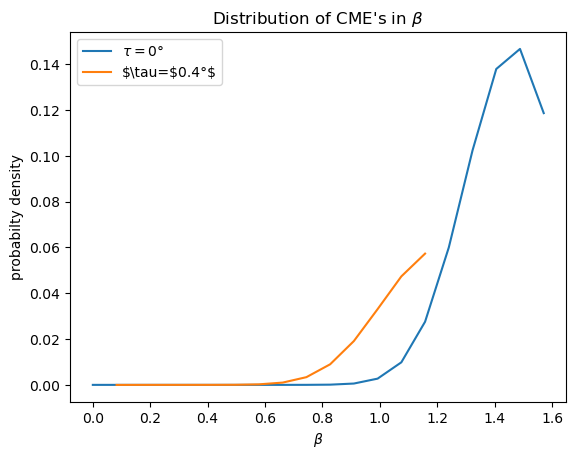

In [ ]:
# partial results after 40 min of fast=False integration

b = np.array([0.         , 0.08267349 , 0.16534698 , 0.24802047, 0.33069396 , 0.41336745, 0.49604095 , 0.57871444 , 0.66138793 , 0.74406142, 0.82673491, 0.9094084, 0.99208189 , 1.07475538 , 1.15742887 , 1.24010236 , 1.32277585 , 1.40544935, 1.48812284 , 1.57079633])
p1=np.array([-1.244302803098822e-07, -2.020597301041954e-08, -2.9419197471627263e-09, -3.8506323427838335e-10, -3.9187265313228005e-11, 1.9396522511149444e-10, 4.663246386506073e-09, 8.342455036253888e-08, 1.1389400438405107e-06, 1.1879469422441976e-05, 9.478730484257619e-05, 0.0005795594748075021, 0.0027215705946284224, 0.009845515893399727, 0.027552861542427205, 0.059989051795611634, 0.10235890555562867, 0.13789471596377173, 0.1466504419075839, 0.11862377157730396])

b2 = [0.08267349088394192, 0.16534698176788384, 0.24802047265182575, 0.3306939635357677, 0.4133674544197096, 0.4960409453036515, 0.5787144361875934, 0.6613879270715354, 0.7440614179554773, 0.8267349088394192, 0.9094083997233612, 0.992081890607303,  1.074755381491245,  1.1574288723751869]
p2 = [ -2.22823150296887e-05, -5.713519770368957e-06, -1.3154789700561033e-06 -2.291901862322346e-07, 5.214006036830509e-07,  5.532554756659216e-06,  4.068847682634011e-05,  0.00022888900934754633,  0.0009946273992843017, 0.0033683418491653166, 0.008984065218520531, 0.019127553436737478,0.033065651186741915, 0.047353504995598206,  0.05729989712276298]


plt.plot(b, p1, label=fr'$\tau=$0°')
plt.plot(b2, p2, label=fr'$\tau=$0.4°$')

# plt.ylim(0,5)
plt.title(r"Distribution of CME's in $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel("probabilty density")
plt.legend()

\begin{equation}
    \rho^{\text{any }\tau}_\beta(\beta) = \frac{2}{N|\sin\beta|}  \int_{[0,\pi]  \times [0,\pi/2] } d\theta d\theta'  \rho^{CME}(\theta') \sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)
\end{equation}

In [35]:
from scipy import integrate
def get_sinphi2(theta, theta2, beta):
    cosphi2 = (np.cos(beta)  - np.cos(theta)*np.cos(theta2) )/ (np.sin(theta)*np.sin(theta2)) 
    return 0 if np.abs(cosphi2) >1 else (1-cosphi2**2)**0.5

def f_integrand_any_tau(beta):
        def integrand2(theta, theta2):
            return integrand_any_tau(theta, theta2, beta)
        return integrand2

def integrand_any_tau(theta, theta2, beta):
    sinphi2 = get_sinphi2(theta, theta2, beta)
        
    return np.sin(theta)**2 * np.sin(theta2)**2 * rho_CME(theta2) * sinphi2 / np.abs(np.sin(beta))


def get_rho_beta_any_tau(beta):
    start_time = time.time()
    print(beta, end='\r')
    result, error = integrate.nquad(f_integrand_any_tau(beta), [[0, np.pi], [0, np.pi / 2 ]], opts={"epsrel":5e-3})      # theta, phi, theta2

    end_time = time.time()
    print(f'For params {beta=}we find the distibution to be {result}, with estimated error {error}. \
        Taking {(end_time-start_time):.2f} to calculate.')

    return result

For params beta=0.01we find the distibution to be 5.610671795476592e-11, with estimated error 4.443782030348164e-06.         Taking 0.55 to calculate.


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1272: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


For params beta=0.04185298626112034we find the distibution to be 0.000422490325536906, with estimated error 2.300188761641085e-05.         Taking 111.26 to calculate.
For params beta=0.07370597252224068we find the distibution to be 0.0012970576771701217, with estimated error 3.6524692369067045e-05.         Taking 36.43 to calculate.
For params beta=0.10555895878336101we find the distibution to be 0.001973377052457322, with estimated error 4.9102646036488416e-05.         Taking 3.62 to calculate.
For params beta=0.13741194504448137we find the distibution to be 0.002566226406715436, with estimated error 5.601600776860454e-05.         Taking 1.11 to calculate.
For params beta=0.16926493130560172we find the distibution to be 0.003154587262427889, with estimated error 8.054344870841155e-05.         Taking 3.64 to calculate.
For params beta=0.20111791756672204we find the distibution to be 0.0037412889792924724, with estimated error 9.20631436659507e-05.         Taking 1.30 to calculate.
For 

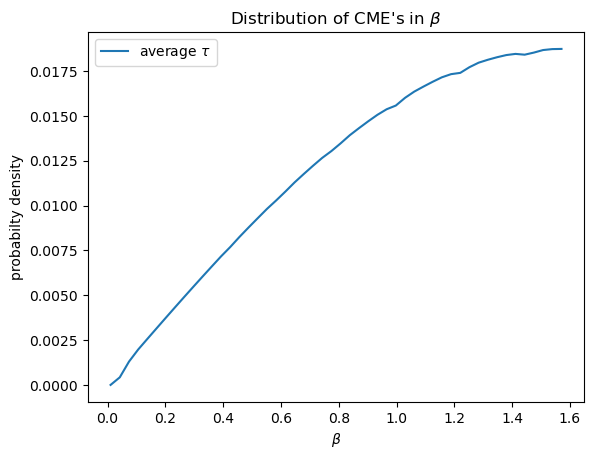

In [36]:

def rho_betas(betas):
    return [get_rho_beta_any_tau(beta) for beta in betas]

betas = np.linspace(0.01,np.pi/2, 50)

a = rho_betas(betas)
plt.plot(betas, a, label=r'average $\tau$')
print(betas, a)

# plt.ylim(0,5)
plt.title(r"Distribution of CME's in $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel("probabilty density")
plt.legend()

for $\kappa = \cos \beta$ we have $d\kappa =  - \sin \beta d\beta$ and therefore as $\rho_\beta(\beta)d\beta = -\rho_\kappa d\kappa$ so $\rho_\kappa(\kappa) = \sin \beta \rho_\beta(\beta)$. 
\begin{equation}
    \rho^{\text{any }\tau}_\kappa(\kappa) = \frac{2}{N|}  \int_{[0,\pi]  \times [0,\pi/2] } d\theta d\theta'  \rho^{CME}(\theta') \sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)
\end{equation}

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17180\2099028693.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sin(theta)**2 * np.sin(theta2)**2 * rho_CME(theta2) * sinphi2 / np.abs(np.sin(beta))
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17180\2099028693.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sin(theta)**2 * np.sin(theta2)**2 * rho_CME(theta2) * sinphi2 / np.abs(np.sin(beta))
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1272: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


For params beta=0.0we find the distibution to be nan, with estimated error 0.         Taking 40.60 to calculate.
For params beta=0.17453292519943295we find the distibution to be 0.00325053778444515, with estimated error 7.215804674636731e-05.         Taking 1.05 to calculate.
For params beta=0.3490658503988659we find the distibution to be 0.006404679842274804, with estimated error 0.00016190302629126227.         Taking 3.35 to calculate.
For params beta=0.5235987755982988we find the distibution to be 0.00936446440427478, with estimated error 0.00019663618008163573.         Taking 1.02 to calculate.
For params beta=0.6981317007977318we find the distibution to be 0.012038668682387338, with estimated error 0.00025129613738313875.         Taking 3.95 to calculate.
For params beta=0.8726646259971648we find the distibution to be 0.014346896023031658, with estimated error 0.0003962472974852818.         Taking 5.43 to calculate.
For params beta=1.0471975511965976we find the distibution to be 0

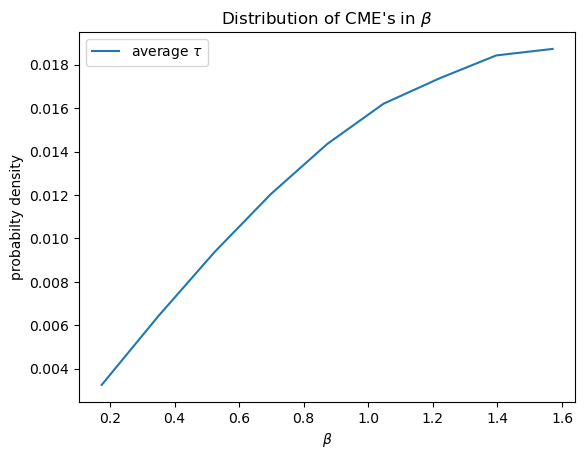

In [ ]:
from scipy import integrate
def get_sinphi2(theta, theta2, beta):
    cosphi2 = (np.cos(beta)  - np.cos(theta)*np.cos(theta2) )/ (np.sin(theta)*np.sin(theta2)) 
    return 0 if np.abs(cosphi2) >1 else (1-cosphi2**2)**0.5

def _integrand_any_tau(beta):
        def integrand2(theta, theta2):
            return integrandk_any_tau(theta, theta2, beta)
        return integrand2

def integrandk_any_tau(theta, theta2, beta):
    sinphi2 = get_sinphi2(theta, theta2, beta)
        
    return np.sin(theta)**2 * np.sin(theta2)**2 * rho_CME(theta2) * sinphi2 


def get_rho_kappa_any_tau(kappa):
    start_time = time.time()
    beta = np.acos(kappa)
    print(beta, end='\r')
    result, error = integrate.nquad(_integrand_any_tau(beta), [[0, np.pi], [0, np.pi / 2 ]], opts={"epsrel":1e-2})      # theta, phi, theta2

    end_time = time.time()
    print(f'For params {beta=}we find the distibution to be {result}, with estimated error {error}. \
        Taking {(end_time-start_time):.2f} to calculate.')

    return result


def rho_kappas(kappas):
    return [get_rho_beta_any_tau(kappa) for kappa in kappas]

kappas = np.linspace(0,np.pi/2, 10)

a = rho_betas(kappas)
plt.plot(kappas, a, label=r'average $\tau$')
print(kappas, a)

# plt.ylim(0,5)
plt.title(r"Distribution of CME's in $\kappa$")
plt.xlabel(r"$\kappa$")
plt.ylabel("probabilty density")
plt.legend()
plt.legend()

[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633] [nan, 0.00325053778444515, 0.006404679842274804, 0.00936446440427478, 0.012038668682387338, 0.014346896023031658, 0.0162038548356757, 0.017380107311610982, 0.018428364620120822, 0.018727931587596766]


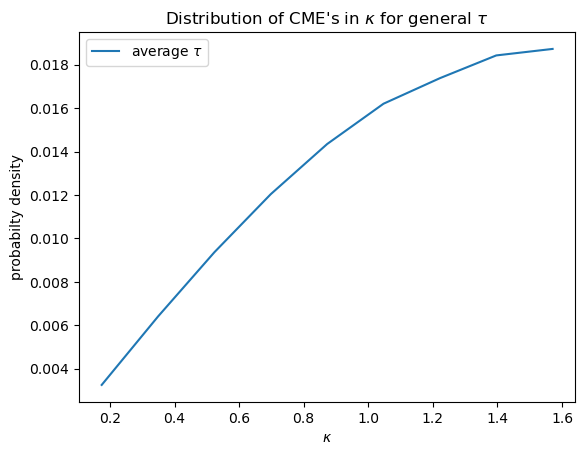

In [40]:

kappas = np.linspace(0,np.pi/2, 10)

plt.plot(kappas, a, label=r'average $\tau$')
print(kappas, a)

# plt.ylim(0,5)
plt.title(r"Distribution of CME's in $\kappa$ for general $\tau$")
plt.xlabel(r"$\kappa$")
plt.ylabel("probabilty density")
plt.legend()
plt.legend()